<h1><center> EJERCICIO 3, PRIMERA TAREA. </center></h1>

Suponga que para el modelo de regresión lineal simple con parámetros:
    
$$\mathbf{\beta}=(\beta_0,...,\beta_{k-h},\beta_{k-h+1},...,\beta_k)'=(\mathbf{\beta_1},\mathbf{\beta_2})$$ 
    
Se quiere probar si el subconjunto de betas $\mathbf{\beta_2}$ es igual cero, es decir:
$$H_0:\mathbf{\beta_2}=(\beta_{k-h+1},...,\beta_k)=0 \text{ vs } H_a: \mathbf{\beta_2} \neq  0$$
    
Para esto se generan dos modelos de regresión: 
    
El modelo saturado con todas las variables que produce las siguientes estimaciones: 

$$\hat{\beta}=(\mathbf{X'X})^{-1}\mathbf{X'y} \quad \quad \hat{\mathbf{y}}=X\mathbf{\hat{\beta}}$$
        
El modelo reducido que produce las siguientes estimaciones:  

$$\hat{\beta}_1=(\mathbf{X_1'X_1})^{-1}\mathbf{X_1'y} \quad \quad \hat{\mathbf{y}}_r=X_1\mathbf{\hat{\beta}_1}$$

    
Donde la matriz $\mathbf{X_1}$ contiene hasta la columna h de $\mathbf{X}$, ahora considere las siguientes cantidades:
  
- $SST = \sum_{i=1}^n (y_i-\bar{y})^2$
- $SSE = \sum_{i=1}^n (y_i-\hat{y}_i)^2$
- $SSR = \sum_{i=1}^n (\hat{y}_i-\bar{y})^2$
- $SSR_{r} = \sum_{i=1}^n (\hat{y}_{r_i}-\bar{y})^2$
- $SS(\mathbf{\beta}_2 | \mathbf{\beta}_1) = \mathbf{\hat{y}}'\mathbf{y}-\mathbf{\hat{y}_r}'\mathbf{y} $
 
Muestre que:

## a)

- $SST = SSE + SS(\beta_2 | \beta_1)+SSR_r$
- $SS(\beta_2 | \beta_1) = SSR-SSR_r$
- $SS(\beta_2 | \beta_1) = y'(H-H_1)y \sim \chi^2(h)\text{ si es verdad }  H_0:\mathbf{\beta_2} = 0$
- $SSE = y'(I-H)y \sim \chi^2(n-k)$

Donde: $\mathbf{H = X(X'X)^{-1}X'}$ y $\mathbf{H_1 = X_1(X_1'X_1)^{-1}X_1'}$

1. $SST = SSE + SS(\beta_2|\beta_1) + SSR_r$

__PRUEBA__:

Utilizando el resultado de __2.__ : $SSE + SSR - SSS_r + SSR_r$ = $SSE + SSR$

Y por un resulta visto en clase se concluye la igualdad. $\blacksquare$

2. $SS(\beta_2 | \beta_1) = SSR-SSR_r$

__PRUEBA__:

Partiré de: $SSR - SSR_r$ 

En clase se llegó al siguiente resultado: $SSR = \hat\beta x'y-n\bar y^2$

Entonces adaptando ese resultado al modelo reducido: $\hat\beta x'y-n\bar y^2 - (\hat\beta_1 x_1'y-n\bar y^2)$ = $\hat\beta x'y-n\bar y^2 - \hat\beta_1 x_1'y+n\bar y^2$ = $\hat\beta x'y- \hat\beta_1 x_1'y$

"Factorizando" el operador transposición: $(\hat\beta' x)'y- (\hat\beta_1' x_1)'y$

Que justamente resulta en: $\hat{y}'y- \hat{y_r}'y$ $\blacksquare$

4. $SSE = y'(I-H)y \sim \chi^2(n-k-1)$ 

__PRUEBA__:

En clase vimos : $SST = SSR + SSE$

Despejando SSE: $ SSE = SST - SSR$

Dividiendo entre $\frac{1}{\sigma^2}$: $\frac{SSE}{\sigma^2} = \frac{SST}{\sigma^2} - \frac{SSR}{\sigma^2}$

Estas se distribuyen Chi cuadrada. Además, los grados de libertad son aditivos: $\frac{SSE}{\sigma^2} = n-1 -k +1 = n-k$

Así: $SSE = y'(I-H)y \sim \chi^2(n-k-1) \blacksquare$

## b)

Demuestre que el estadístico de contraste F defnido como el siguiente cociente de sumas de cuadrados se puede escribir en términos de las R cuadradas de los dos modelos ajustados como sigue:
        $$
        F = \frac{SS(\mathbf{\beta}_2 | \mathbf{\beta}_1)/h}{SSE/(n-k-1)} = \frac{(R^2-R^2_r)/h}{(1-R^2)/(n-k-1)}
        $$
        Encuentre la distribución de F bajo el supuesto de que $H_0$ es verdadera y con toda esta información construya de manera teórica la tabla ANOVA para probar que $H_0:\mathbf{\beta_2}=0$.
        

__NOTA: ESTUVE BATALLANDO BASTANTE PARA LA REMOSTRACIÓN. NO LA CONCLUÍ PERO SÍ ME GUSTARÍA ADJUNTAR EL CAMINO QUE SEGUÍ PARA VER SI ERA CUESTIÓN DE UN "TRUQUITO" O DE PLANO ESTABA MAL. LA ADJUNTO DE ESTA FORMA PORQUE SÉ QUE DE CUALQUIER FORMA ESTÁ MAL Y SOLO QUIERO ILUSTRAR EL CÓMO ABORDE LA DEMOSTRACIÓN.__

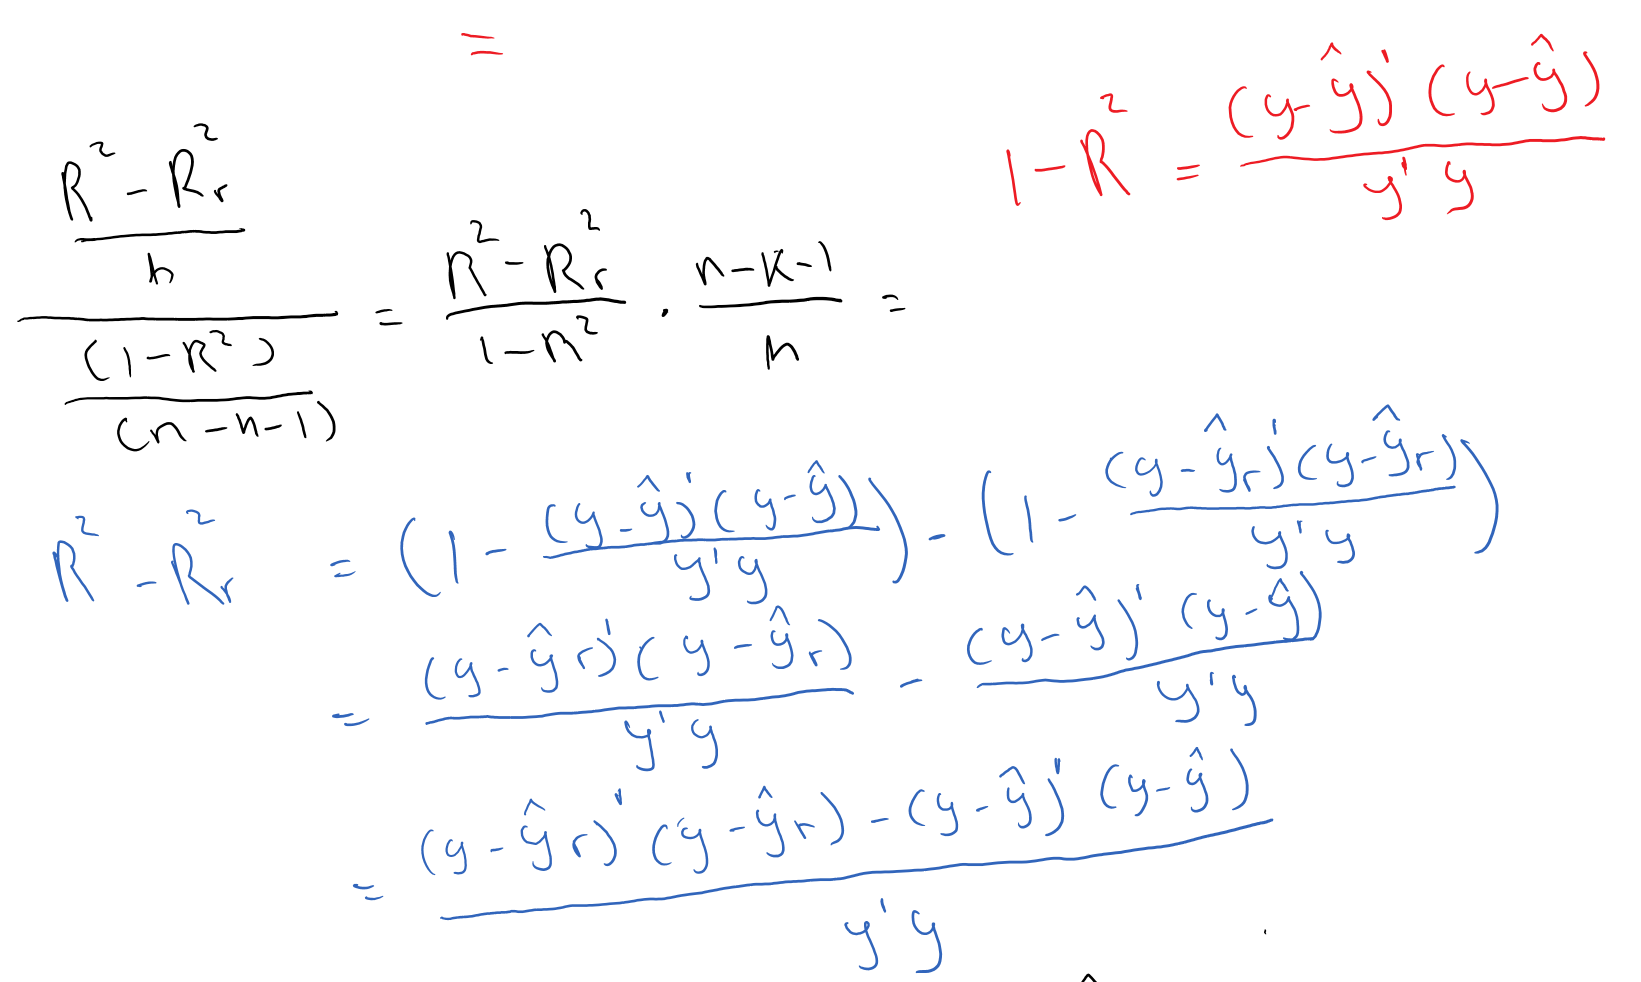

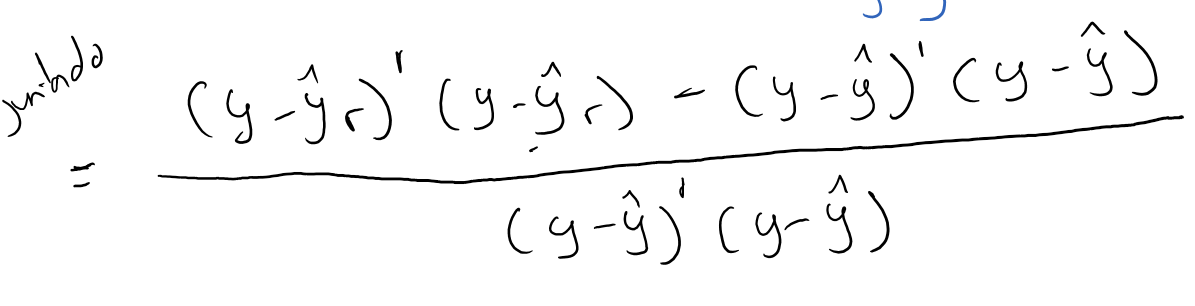

__DESARROLLANDO ALGEGRAICAMENTE__
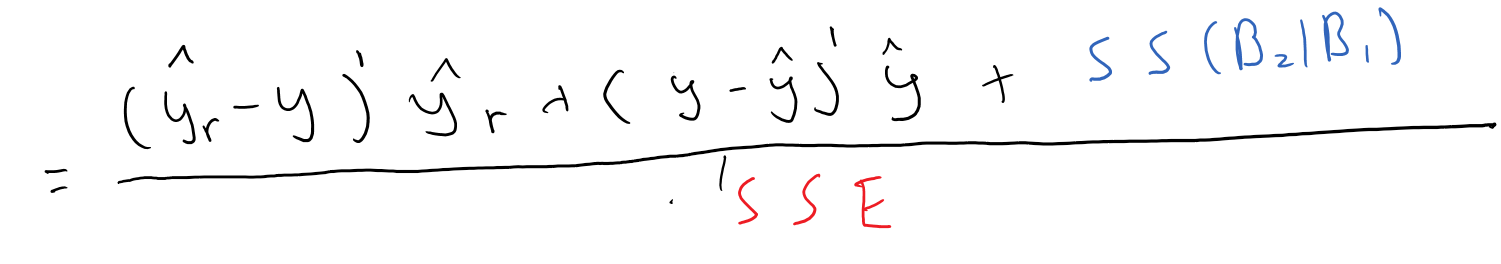

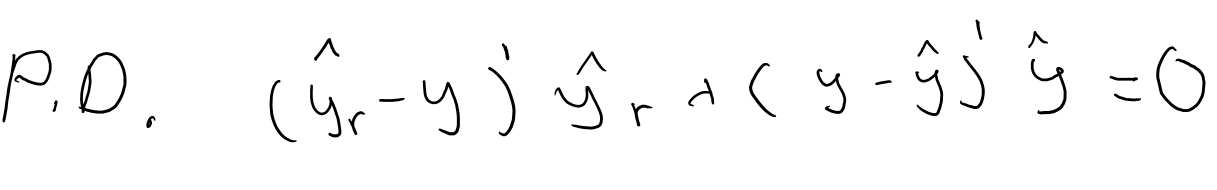

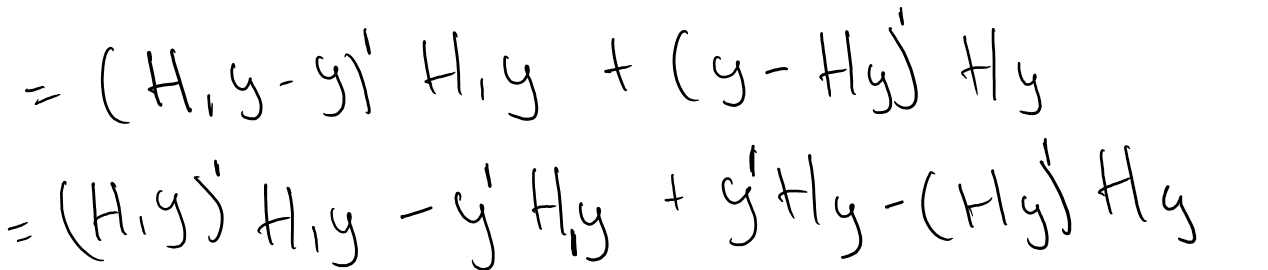

## c)
El archivo _vino.csv_ contiene una serie de mediciones químicas de varias botellas de vino de diferentes proveedores, se requiere determinar si es posible estimar el nivel de alcohol en cada botella con base en las otras mediciones. Ajuste un modelo de regresión con todas las variables (modelo ajustado) y determine que subconjunto de columnas no son significativas, posteriormente ajuste otro modelo de regresión reducido omitiendo las columnas no significativas y rellene la tabla ANOVA anterior, luego realice el contraste para verificar si el subconjunto de columnas descartadas anteriormente son cero y finalmente verifique que se cumple la identidad del inciso b con los coeficientes de determinación $R^2$ y $R_r^2$ de ambos modelos. 

### Descargar librarías.

In [10]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

### Importar información.

In [2]:
df = pd.read_csv("vinos.csv")

### Ajuste con todas las variables (Modelo Saturado)

In [3]:
for x in df.columns:
    df[x] = df[x].astype("float64") 

In [4]:
Yreg = df.Alcohol
Xreg = sm.add_constant(df.drop(columns = "Alcohol"))
model = sm.OLS(Yreg,Xreg).fit()
display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     20.08
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.61e-26
Time:                        22:18:20   Log-Likelihood:                -134.83
No. Observations:                 178   AIC:                             295.7
Df Residuals:                     165   BIC:                             337.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.0718      0.596     18.567      0.000       9.894      12.249
MalicAcid           0.1316      0.045      2.907      0.004       0.042       0.221
Color               0.1630      0.027      5.941      0.000       0.109       0.217
Proline             0.0010      0.000      5.081      0.000       0.001       0.001
Ash                 0.1379      0.217      0.636      0.526      -0.290       0.566
Alcalinity         -0.0378      0.018     -2.122      0.035      -0.073      -0.003
Magnesium        4.179e-06      0.003      0.001      0.999      -0.007       0.007
Phenols             0.0521      0.134      0.389      0.698      -0.212       0.317
Flavanoids          0.0091      0.107      0.085      0.932      -0.202       0.220
Nonflavanoid       -0.2078      0.434     -0.479      0.632      -1.064       0.648
Proanthocyanins    -0.1525      0.098     -1.552      0.122      -0.346       0.041
Hue                 0.2169      0.281      0.772      0.441      -0.338       0.772
DilutedWines        0.1608      0.110      1.466      0.145      -0.056       0.377
==============================================================================
Omnibus:                        0.348   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.840   Jarque-Bera (JB):                0.121
Skew:                           0.025   Prob(JB):                        0.941
Kurtosis:                       3.118   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Filtraré los coeficientes cuyos Pvalues sean menores a .05

In [5]:
model.pvalues[model.pvalues < .05].index

Index(['const', 'MalicAcid', 'Color', 'Proline', 'Alcalinity'], dtype='object')

### Ajuste con variables significativas

In [6]:
Yreg2 = df.Alcohol
Xreg2 = sm.add_constant(df[['MalicAcid', 'Color', 'Proline', 'Alcalinity']])
model2 = sm.OLS(Yreg2,Xreg2).fit()
display(model2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     57.60
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           7.91e-31
Time:                        22:18:20   Log-Likelihood:                -139.61
No. Observations:                 178   AIC:                             289.2
Df Residuals:                     173   BIC:                             305.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8296      0.329     35.985      0.000      11.181      12.478
MalicAcid      0.1024      0.040      2.576      0.011       0.024       0.181
Color          0.1249      0.020      6.366      0.000       0.086       0.164
Proline        0.0013      0.000      8.209      0.000       0.001       0.002
Alcalinity    -0.0337      0.014     -2.415      0.017      -0.061      -0.006
==============================================================================
Omnibus:                        0.661   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.718   Jarque-Bera (JB):                0.447
Skew:                           0.115   Prob(JB):                        0.800
Kurtosis:                       3.087   Cond. No.                     6.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ANOVA

In [7]:
ANOVA = pd.DataFrame({"DF": [model2.df_model,model2.df_resid,model2.df_model + model2.df_resid],
                      "SS": [model2.ess,model2.ssr,model2.ess + model2.ssr],
                      "MS":[model2.mse_model,model2.mse_resid,np.nan],
                      "F":[model2.fvalue,np.nan,np.nan], "PValue":[model2.f_pvalue,np.nan,np.nan]}, index = ["Regresión", "Residual","Total"])
ANOVA

,DF,SS,MS,F,PValue
Regresión,4.0,66.625026,16.656257,57.597235,7.912614e-31
Residual,173.0,50.029006,0.289185,NaN,NaN
Total,177.0,116.654032,NaN,NaN,NaN


Aún cuando las anteriores columnas no eran significativas, sí que aportaban al modelo o al menos lo hacían mejor que al ajustado con reducción de variables. Esto se puede observar en todas las métricas de bondad de ajuste y hasta en las pruebas de normalidad y autocorrelación.

Verificar que se cumple:

$$ F = \frac{SS(\beta_2|\beta_1)/h}{SSE/(n-k-1)} = \frac{(R^2-R_r^2)/h}{(1 - R^2)/(n-k-1)} $$ 

$\frac{(R^2-R_r^2)/h}{(1 - R^2)/(n-k-1)}$

In [69]:
R2 = model.rsquared
R2r = model2.rsquared
h = 4
n = 178
k = 5

F = ((R2-R2r)/h)/((1-R2)/(n-k-1)); F

2.3723486802314064

In [71]:
from scipy.stats import f
f.pdf(F,h,n-k-1)

0.08508489038483572